In [1]:
################## Thsi will be not explorted in PDF juste for internal pre-processing

from IPython.display import display, HTML


def show_figure_pair_with_captions(img1, caption1, img2=None, caption2=None, first_part_path=None):
    
    img1 = first_part_path+img1
    global fig_counter
    if not img2 is None: 
        img2 = first_part_path+img2
        html = f"""
        <div style="width: 19cm; display: flex;">
          <div style="width: 9cm; text-align: center;">
            <img src="{img1}" style="width: 9cm;">
            <div style="width: 9cm; word-wrap: break-word;">
                <b>Figure {fig_counter}:</b> {caption1}
            </div>
          </div>
          <div style="width: 1cm;"></div>
          <div style="width: 9cm; text-align: center;">
            <img src="{img2}" style="width: 9cm;">
            <div style="width: 9cm; word-wrap: break-word;">
                <b>Figure {fig_counter + 1}:</b> {caption2}
            </div>
          </div>
        </div>
        <br>
        """
    else: 
        html = f"""
        <div style="width: 19cm; display: flex;">
          <div style="width: 9cm; text-align: center;">
            <img src="{img1}" style="width: 9cm;">
            <div style="width: 9cm; word-wrap: break-word;">
                <b>Figure {fig_counter}:</b> {caption1}
            </div>
          </div>
          <div style="width: 1cm;"></div>
          <div style="width: 9cm; text-align: center;">

          </div>
        </div>
        <br>
        """
    fig_counter += 2
    display(HTML(html))


In [82]:
import pandas as pd 
import numpy as np

In [31]:
# CONFIGURATIONS
#help(handcalcs.set_option)
import handcalcs.render
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)

## Theoretical Background of the PI Controller

 **Transfer functions**
 <br>First order system
 $ G(s) = \frac {1}{1+T_o . s}$ 
 <br>
 The PI controler 
$ PI(s) = K_p + \frac{K_i}{s} = Kp \frac {1+T_i.s}{T_i.s} $
<br> where $ T_i = \frac{K_p}{K_i}$  
Open loop <br>
$ H(s)= G(s).PI(s)= \frac {1}{1+T_o . s}  Kp \frac {1+T_i.s}{T_i.s} = \frac {Kp }{T_i.s}\frac {1+T_i.s}{1+T_o . s} : (I)$ 
 <br><br>
**Methode 1: Cancellation and Dominant Pole Approximation**
<br> 
we chose: 
<br>
$T_i =T_o 
 \Rightarrow
 H(s)= \frac {K_p}{T_i.s}$
 <br>
Closed loop 
 <br>
$H_c(s)= \frac{H(s) }{ 1+H(s)}= \frac{1 }{ 1+\frac {1}{H(s)}} : (II)$ 
 <br>
$H_c(s)= \frac{1 }{ 1+\frac {T_i}{K_p}.s}= \frac{1 }{ 1+T_{oc}.s}$
 <br>
Where $ T_{oc} = \frac {T_i}{K_p}$
 <br><br>
Objective: To make the closed-loop system 𝑛 times faster than the initial system.
<br>
so : $ T_{oc} =\frac {T_o}{n} = \frac{T_i}{n}$ and 
$ T_{oc} = \frac {T_i}{K_p}$<br>
$ \Rightarrow \boxed{K_p = n} $<br>
And $ T_i =T_o =  \frac{K_p}{K_i}$  <br>
$  \Rightarrow K_i= \frac{K_p}{T_o}$<br>
$  \Rightarrow \boxed{K_i=\frac {n}{T_o}} $


**Methode 2: Dominant Pole Approximation**
 <br>
 From equation $ (II) $ <br>
$ Hc(s) = \frac{1}{1+ \frac {T_i.s}{K_p} \frac {1+T_o . s}{1+T_i.s} }  = \frac{1+T_i.s}{1+(T_i+\frac{T_i}{K_p}).s+\frac{T_i.T_o}{K_p}.s^2}$
 <br>
$Hc(s) ≈\frac{1}{1+2\zeta\frac{s}{w_n}+\frac{s^2}{w_n^2}} $
 <br>
if $ Ti.wn <<1 $
$ w_n^2 = \frac{K_p}{T_i.T_o} $ $(III)$
 <br>
 Where <br>
$ 2\zeta\frac{1}{w_n} = (T_i+\frac{T_i}{K_p}) $ 
 <br>
$ K_p = 2.\zeta.w_n.T_o-1$
 <br>
 And <br>
$ T_i= \frac{K_p}{w_n^2.T_o} $ 
<br>
The condition $(III)$ 
<br>
$ T_i.w_n ≪ 1  \Rightarrow  T_i.w_n = \frac{K_p}{w_n.T_o}=2*\zeta -\frac{1}{w_n.T_o} ≪ 1 $
<br>
for $ \zeta=1 \Rightarrow  w_n ≪ T_o $
<br><br> this methode work only if the closed loop is slow than the initial system

## Simulation of PI controller and RC first order system

### RC first order system

See setup in **Figure 5**

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
class FirstOrder:
    def __init__(self, To, Ts, A=1.0, y0=0.0):
        self.a = Ts / To
        self.A = A
        self.y = y0

    def step(self, u):
        self.y += self.a * (self.A * u - self.y)
        return self.y


class PI_cont:
    def __init__(self, Kp, Ki, Ts, y0=0.0):
        # Ti = Kp/Ki
        self.Kp = Kp
        self.Ki = Ki
        self.Ts = Ts
        self.integral = 0.0
        self.y = y0

    def step(self, error):
        self.integral += error * self.Ts
        self.y = self.Kp * error + self.Ki * self.integral
        return self.y
class limiter: 
    def _init(self, lower, upper): 
        self.L = lower
        self.U = upper
    def step(self, u):
        if u < self.L: 
            return self.L
        if u > self.U: 
            return self.U
        return u
        
class sim_first_1_controller_PI: 
    def __init__(self, Ts_sim, Ts_ctrl, Kp, Ki):
        self.Ts_sim = Ts_sim
        self.Ts_ctrl = Ts_ctrl
        self.Kp = Kp 
        self.Ki = Ki
    def sim(self, u):
        N = len(u)
        Ts = self.Ts_sim
        Ts_ctrl = self.Ts_ctrl
        Ts_n = int(Ts_ctrl/Ts)


        G1 = FirstOrder(To, Ts)
        G2 = FirstOrder(To, Ts)
        C  = PI_cont(Kp=Kp, Ki=Ki, Ts=Ts_ctrl)
        
        y1, y2 = [], []
        control2 = 0.0
        
        for i in range(N):
            # open-loop
            y1.append(G1.step(u[i]))
        
            # closed-loop with controller update every 10 steps (ZOH in between)
            e = u[i] - G2.y
            if i % Ts_n  == 0:
                control2 = C.step(e)
            y2.append(G2.step(control2))
        return np.array(y1), np.array(y2)

In [48]:
%%render long
# RC sys
R=4660# Ω : measurement
C_uF=4.772# µF : nominal 4.7uF
C = C_uF*1e-6
To=R*C # s

# System & controller
Kp = 3 # closed loop 3 time more fast
Ti =  To
Ki = Kp/Ti         

 
# simulation params
Ts_sim_us = 1 # us
Ts_sim = Ts_sim_us*1e-6
Ts_ctrl = 100*Ts_sim # update PI each 100µs
Tsimulation  = 0.5 # s

<IPython.core.display.Latex object>

In [49]:
Sim_Model= sim_first_1_controller_PI(Ts_sim = Ts_sim , Ts_ctrl=Ts_ctrl, Kp=Kp, Ki=Ki)

In [55]:
## Input 
N = int(Tsimulation/Ts_sim)
time = np.arange(0, Ts_sim  * N, Ts_sim )
u = np.ones(N)
u[0:N//10]=0
u[6*N//10:]=0.7

In [56]:
y1, y2 = Sim_Model.sim(u)

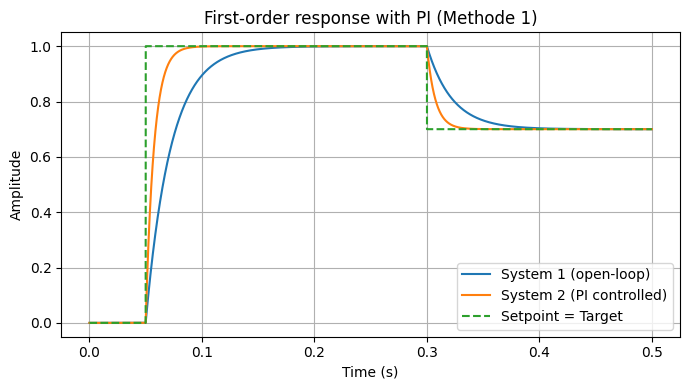

In [59]:
# Plot
plt.figure(figsize=(7,4))
plt.plot(time, y1, label='System 1 (open-loop)')
plt.plot(time, y2, label='System 2 (PI controlled)')
plt.plot(time, u, '--', label='Setpoint = Target')
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.title('First-order response with PI (Methode 1)')
plt.legend(); plt.tight_layout()
plt.grid()
plt.show()



### Add a load RL to RC circuit 

See setup in **Figure 6**

First order system RC with load RL
<br> <br> Open loop transfer function: 
<br>
$ H(s) = \frac {A}{1+A.To.s} $ 
<br><br>
Where $ A= \frac{1}{1+\frac{R}{RL}}$

In [68]:
%%render 
RL = 4646 # Ω
# LOAD RESISTOR 
# H(s) = A/(1+A*To*s)
A= 1/(1+R/RL)
A

<IPython.core.display.Latex object>

In [73]:
load = np.zeros(N)
load[N//3:2*N//3]=0.4

In [74]:
u = np.ones(N)
N = len(u)
Ts = Ts_sim
Ts_ctrl = Ts_ctrl
Ts_n = int(Ts_ctrl/Ts)


G1 = FirstOrder(To, Ts)
G2 = FirstOrder(To, Ts)
C  = PI_cont(Kp=Kp, Ki=Ki, Ts=Ts_ctrl)

y1, y2 = [], []
control2 = 0.0
ycont = []
for i in range(N):
    if i ==N//3: 
        G1.a = Ts / (To*A)
        G1.A= A

        G2.a = Ts / (To*A)
        G2.A= A
    if i ==2*N//3: 
        G1.a = Ts / (To)
        G1.A= 1

        G2.a = Ts / (To)
        G2.A= 1
    # open-loop
    y1.append(G1.step(u[i]))

    # closed-loop with controller update every 10 steps (ZOH in between)
    e = u[i] - G2.y
    if i % Ts_n  == 0:
        control2 = C.step(e)
    ycont.append(control2)
    y2.append(G2.step(control2))
y1, y2 = np.array(y1), np.array(y2)

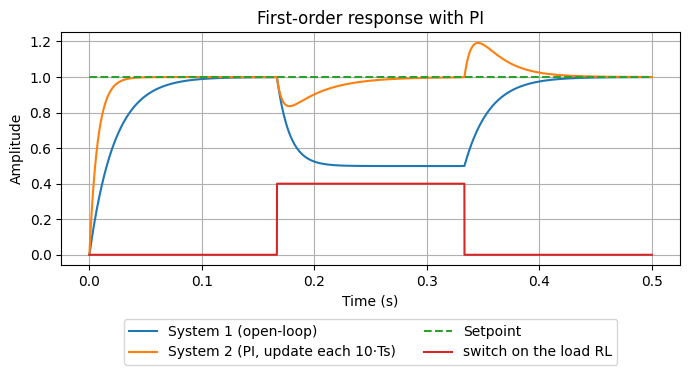

In [79]:
# Plot
plt.figure(figsize=(7,4))
plt.plot(time, y1, label='System 1 (open-loop)')
plt.plot(time, y2, label='System 2 (PI, update each 10·Ts)')
#plt.plot(time, ycont, label='PI controller output')
plt.plot(time, u, '--', label='Setpoint')
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.title('First-order response with PI')
plt.plot(time, load, label ="switch on the load RL")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncols= 2)
plt.tight_layout()
plt.grid()
plt.show()



## ESP32 PWM and ADC and RC circuit 

The ESP32 is configured to generate a 100 kHz PWM signal, while the capacitor voltage is measured via the ADC2. The results of this test are shown below. The combined ADC sampling and data storage time is approximately 32 µs.
<br>
See setup in **Figure 5**

The raw data obtained from the serial communication interface of the ESP32:

In [138]:
path = "../00_DRAFT/df.csv"
df = pd.read_csv(path)
df[["t","v"]]

,t,v
0,1872132.0,0.0
1,1872164.0,0.0
2,1872195.0,0.0
3,1872226.0,0.0
4,1872257.0,0.0
...,...,...
9995,2184244.0,689.0
9996,2184275.0,688.0
9997,2184306.0,689.0
9998,2184337.0,689.0


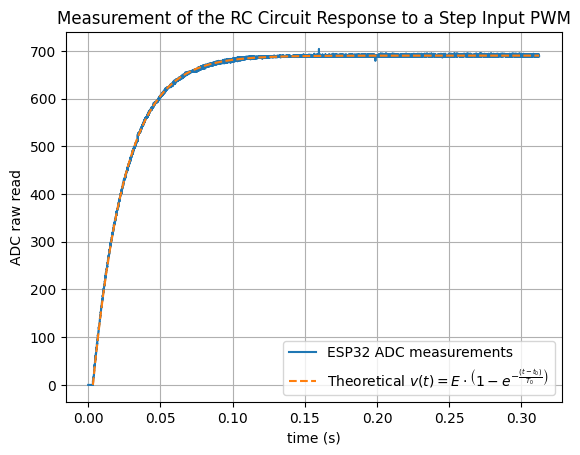

In [140]:
path = "../00_DRAFT/df.csv"
df = pd.read_csv(path)

df.t= df.t-df.t.iloc[0]
df.t= df.t*1e-6

df.plot(x= "t", y="v", label= "ESP32 ADC measurements")
plt.xlabel("time (s)")
plt.ylabel("ADC raw read")


df2= df[df.v>2]
t= df2.t
t2= t-t.iloc[0]
E= df2.v[9000: ].mean()
y= E*(1-np.exp(-t2/To))
plt.plot(
    t, y, linestyle="--",
    label=r"Theoretical $v(t) = E \cdot \left(1 - e^{-\frac{(t-t_0)}{T_0}}\right)$"
)
plt.title("Measurement of the RC Circuit Response to a Step Input PWM")

plt.legend()
plt.grid()

We can see that the RC system closely matches the theoretical first-order system.

# PI controller using ESP32

## Theoretical Background of the PI Controller

## Test Setup

To reduce inductance, i use coaxial cables to connect the gpios to the oscilloscope: See below

In [141]:
captions_list = ["Setup: Input PWM G25 Output G14", 
                "Setup: R=4660Ω C=4.772µF", 
                "Setup: Other angle", 
                "RL (load) = 4646Ω ON/OFF",
                "First order system To= RC= 22.24ms",
                "Setup with oscilloscope and RL"]

In [142]:
figs = ['setup1.png', 'setup2.png', 'setup3.png', 
        'setup4.png', 'setup5.png', 'setup6.png']

In [143]:

fig_counter = 1  # Global figure counter
first_part_path = "../11_images/"
for i in range(0,len (figs),2):

    show_figure_pair_with_captions(
        figs[i],
        captions_list[i],
        figs[i+1],
        captions_list[i+1], 
        first_part_path= first_part_path, 
    )

## Continuous (non-stopping) PI controller

The ESP32 is configured to generate a 100 kHz PWM signal, while the capacitor voltage is measured via the ADC2. The results of this test are shown below. The combined ADC sampling and data storage time is approximately 32 µs.

The raw data obtained from the serial communication interface of the ESP32:

In [144]:
path = "../00_DRAFT/df.csv"
df = pd.read_csv(path)
df[["t","v"]]

,t,v
0,1872132.0,0.0
1,1872164.0,0.0
2,1872195.0,0.0
3,1872226.0,0.0
4,1872257.0,0.0
...,...,...
9995,2184244.0,689.0
9996,2184275.0,688.0
9997,2184306.0,689.0
9998,2184337.0,689.0


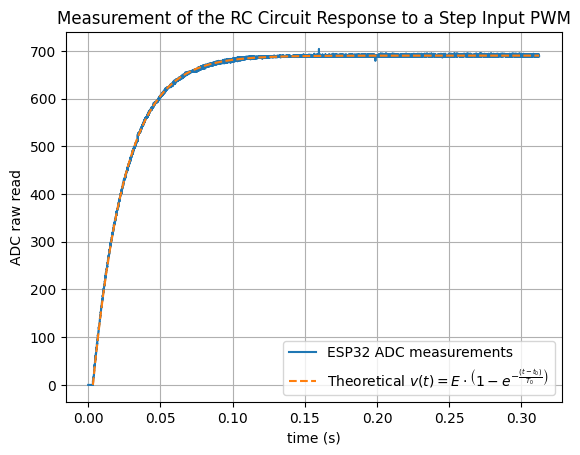

In [145]:
path = "../00_DRAFT/df.csv"
df = pd.read_csv(path)

df.t= df.t-df.t.iloc[0]
df.t= df.t*1e-6

df.plot(x= "t", y="v", label= "ESP32 ADC measurements")
plt.xlabel("time (s)")
plt.ylabel("ADC raw read")


df2= df[df.v>2]
t= df2.t
t2= t-t.iloc[0]
E= df2.v[9000: ].mean()
y= E*(1-np.exp(-t2/To))
plt.plot(
    t, y, linestyle="--",
    label=r"Theoretical $v(t) = E \cdot \left(1 - e^{-\frac{(t-t_0)}{T_0}}\right)$"
)
plt.title("Measurement of the RC Circuit Response to a Step Input PWM")

plt.legend()
plt.grid()

We can see that the RC system closely matches the theoretical first-order system.

### The C implementation of a continuous (non-stopping) PI controller

```c
#include <stdio.h>
#include <stdint.h>
#include <math.h>
#include "esp_err.h"
#include "esp_timer.h"
#include "driver/ledc.h"
#include "driver/adc.h"
#include "esp_rom_sys.h"
#include "driver/gpio.h"
#include "esp_task_wdt.h"


// ----------------- Pins -----------------
#define ADC_PIN_CH   ADC2_CHANNEL_6    // GPIO14 (ADC2)
// GPIO14 (ADC2) can be perturbed by wifi, prefere ADC1
#define PWM_GPIO     25                // PWM output (LEDC)
#define GPIO_TRIGGER      33

// ----------------- Targets & scaling -----------------
// v_target: desired RC output voltage (in volts)
static float v_target = 2.0f;         // volts

// Convert raw ADC (12-bit) to volts for ADC2 @ 11 dB (~0..3.3 V)

static const float ADC_SCALE = 3.3f / 4095.0f;       // raw -> volts





// ----------------- PI controller (as-is) -----------------
static const float To = 0.0222f;   // RC time constant (s)
static const float n  = 3.0f;      // close loop will be 3 times more fast 
static float integral  = 0.0f;
static float integral_ = 0.0f;
static const int Ts_us = 100;  // step time : sampling time 

static float PI_cont(float v_tgt, float v_meas_in) {
    // PI WITH Anti-windup logic

    const float Kp = n;
    const float Ki = Kp / To;

    float PI_out_upper = 1.0f;
    float PI_out_lower = 0.0f;
    float PI_out;
    //   this is Backward Euler (more stable than the forward)
    float e = v_tgt - v_meas_in;
    integral_ = integral + e * Ts_us*1e-6f;
    PI_out = Kp * e + Ki * integral_;
    // Backward Euler integrator uses current error:
    // I[k] = I[k−1] + Ts * e[k]
    // Forward Euler would use the previous error:
    // I[k] = I[k−1] + Ts * e[k−1]
    // Tustin would use the average of the current and previous errors:
    // I[k] = I[k−1] + Ts * (e[k] + e[k−1]) / 2

    // Clamp (preserves your original logic incl. integral_)
    if (PI_out > PI_out_upper) {
        return PI_out_upper;
    } else if (PI_out < PI_out_lower) {
        return PI_out_lower;
    } 

    integral = integral_;
    
    return PI_out;
}




volatile bool level = false;
void step_run() {
    // Measure RC output (volts)
    int raw = 0;
    // adc_width is implicit for adc2_get_raw -> 12 bits in IDF v4.x
    ESP_ERROR_CHECK(adc2_get_raw(ADC_PIN_CH, ADC_WIDTH_BIT_12, &raw));
    float v_meas = raw * ADC_SCALE;   // volts

    // PI control
    float u = PI_cont(v_target, v_meas);

    // Duty 8-bit
    int duty = (int)lroundf(u * 255.0f);
    if (duty < 0)   duty = 0;
    if (duty > 255) duty = 255;

    // Apply PWM
    ESP_ERROR_CHECK(ledc_set_duty(LEDC_LOW_SPEED_MODE, LEDC_CHANNEL_0, duty));
    ESP_ERROR_CHECK(ledc_update_duty(LEDC_LOW_SPEED_MODE, LEDC_CHANNEL_0));


    gpio_set_level(GPIO_TRIGGER, level);
    level = !level;
}

void pwm_init(){
    // ===== Configure LEDC PWM: 100 kHz, 8-bit, GPIO25 =====
    ledc_timer_config_t tcfg = {
        .speed_mode       = LEDC_LOW_SPEED_MODE,
        .duty_resolution  = (ledc_timer_bit_t)8, // 8-bit
        .timer_num        = LEDC_TIMER_0,
        .freq_hz          = 100000,//100kHz
        .clk_cfg          = LEDC_AUTO_CLK,
    };
    ESP_ERROR_CHECK(ledc_timer_config(&tcfg));

    ledc_channel_config_t ccfg = {
        .gpio_num   = PWM_GPIO,
        .speed_mode = LEDC_LOW_SPEED_MODE,
        .channel    = LEDC_CHANNEL_0,
        .intr_type  = LEDC_INTR_DISABLE,
        .timer_sel  = LEDC_TIMER_0,
        .duty       = 0,
        .hpoint     = 0,
        .flags.output_invert = 0,
    };

    ESP_ERROR_CHECK(ledc_channel_config(&ccfg));
}


// ----------------- app_main -----------------
void app_main(void)
{
    // Disable Task Watchdog globally : if we don't make this
    // the MUC restart each 10s 
    #ifdef CONFIG_ESP_TASK_WDT
    esp_task_wdt_deinit();
    #endif


    pwm_init();
    // ===== Configure ADC2: GPIO14, 11 dB, 12-bit =====
    // Note: ADC2 unavailable when Wi-Fi is active.
    ESP_ERROR_CHECK(adc2_config_channel_atten(ADC_PIN_CH, ADC_ATTEN_DB_11));


    // GPIO trigger (debug pin)
    gpio_reset_pin(GPIO_TRIGGER);
    gpio_set_direction(GPIO_TRIGGER, GPIO_MODE_OUTPUT);


    // Before your sampling loop INITIALIZE THE CAPACITOR
    ESP_ERROR_CHECK(ledc_set_duty(LEDC_LOW_SPEED_MODE, LEDC_CHANNEL_0, 0));
    ESP_ERROR_CHECK(ledc_update_duty(LEDC_LOW_SPEED_MODE, LEDC_CHANNEL_0));

    // Wait ~5 tau (5*To = 5*22.2 ms ≈ 111 ms)
    //esp_rom_delay_us(120000);  // 120 ms, blocks CPU (no RTOS tick)
    esp_rom_delay_us(1200000);  // 1200 ms, blocks CPU (no RTOS tick)


    // ===== Sampling loop =====

    while(1) {
        uint32_t t_now = esp_timer_get_time();

        step_run();

        // ~100 µs pacing (busy wait), like your sketch
        while (esp_timer_get_time() < (t_now + Ts_us)) {
            // spin
        }
    }


}

```

### Oscilloscope Measurements and Validation

In [146]:
captions_list = [
"Low frequancy 73kHz", 
"High frequancy 156kHz", 
"Transition high to low frequencies: Freq before",
"Transition high to low frequencies: Freq after", 
"Transition low to high frequencies: Freq before",
"Transition low to high frequencies: Freq after", 
"Dead time ~25ns, in low freq, CH1 rise", 
"Dead time ~25ns, in low freq, CH1 fall", 
"Dead time ~25ns, in the transition", 
"Dead time ~25ns, in high freq, CHA fall", 
"Dead time ~25ns, in high freq, CHA rise", 
"zoom of the dead time", 
"The signal overshoot of CH2",
"overview of the overshoots", 
"ttt"]

In [147]:
figs =[
"01_start.png", 
"01_sw_on_RL.png", 
"01_sw_off_RL.png", 
"01_sw_2onoff_RL.png", 
]

In [148]:
#fig_counter = 1  # Global figure counter
first_part_path = "../10_Data_And_Osciloscope/07_continue_PI_oscillo/"
for i in range(0,len (figs),2):

    show_figure_pair_with_captions(
        figs[i],
        captions_list[i],
        figs[i+1],
        captions_list[i+1], 
        first_part_path= first_part_path, 
    )

# END